In [1]:
# data manipulation # data  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#parse_dates = true to read dates automatically
divvyTrips2014 =pd.read_csv('Social_Economic_Info_By_Zipcode/MergedData/Divvy_2014_merged.csv',parse_dates=True)
divvyTrips2015 =pd.read_csv('Social_Economic_Info_By_Zipcode/MergedData/Divvy_2015_merged.csv',parse_dates=True)
divvyTrips2016 =pd.read_csv('Social_Economic_Info_By_Zipcode/MergedData/Divvy_2016_merged.csv',parse_dates=True)


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (45,46,47,48,49,67,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (45,46,47,48,49,67,71,82,83,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (46,47,48,49,67,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


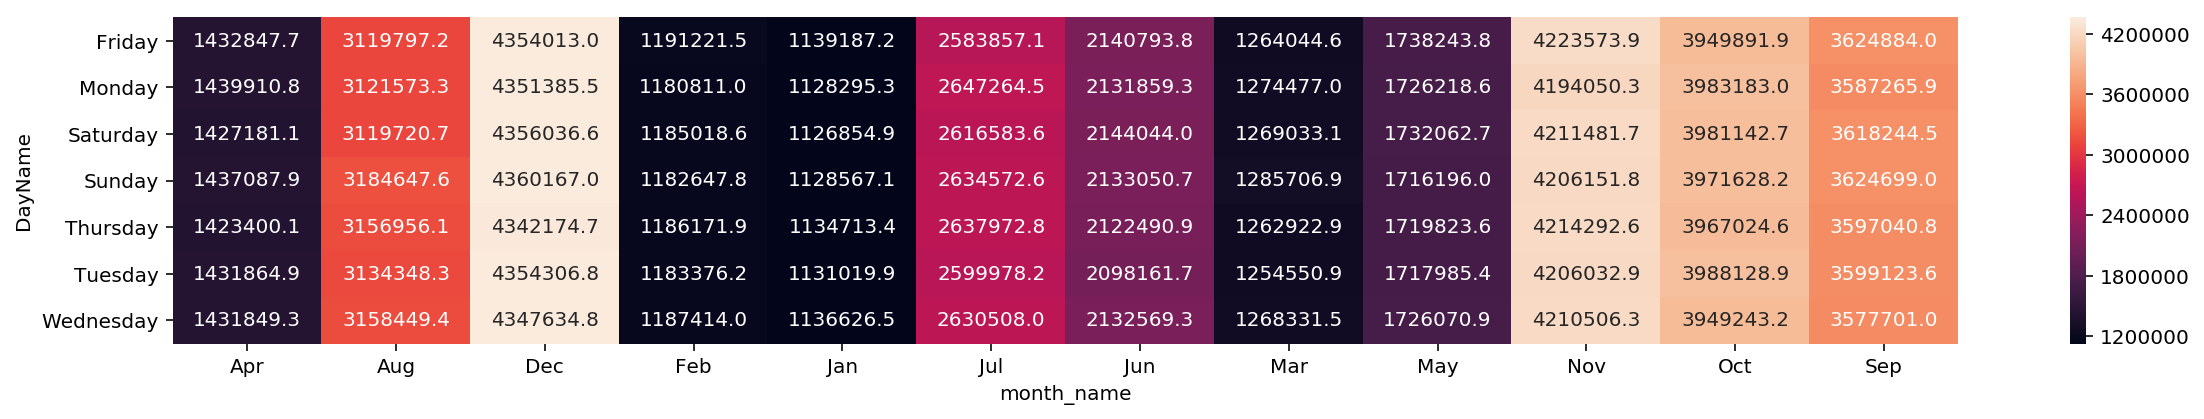

In [91]:
fig = plt.figure(figsize=(20,3))
divvyTripsHM14 = divvyTrips2014.pivot_table(index='DayName',columns='month_name',values='trip_id')
sns.heatmap(divvyTripsHM14, annot=True, fmt=".1f")
plt.show()

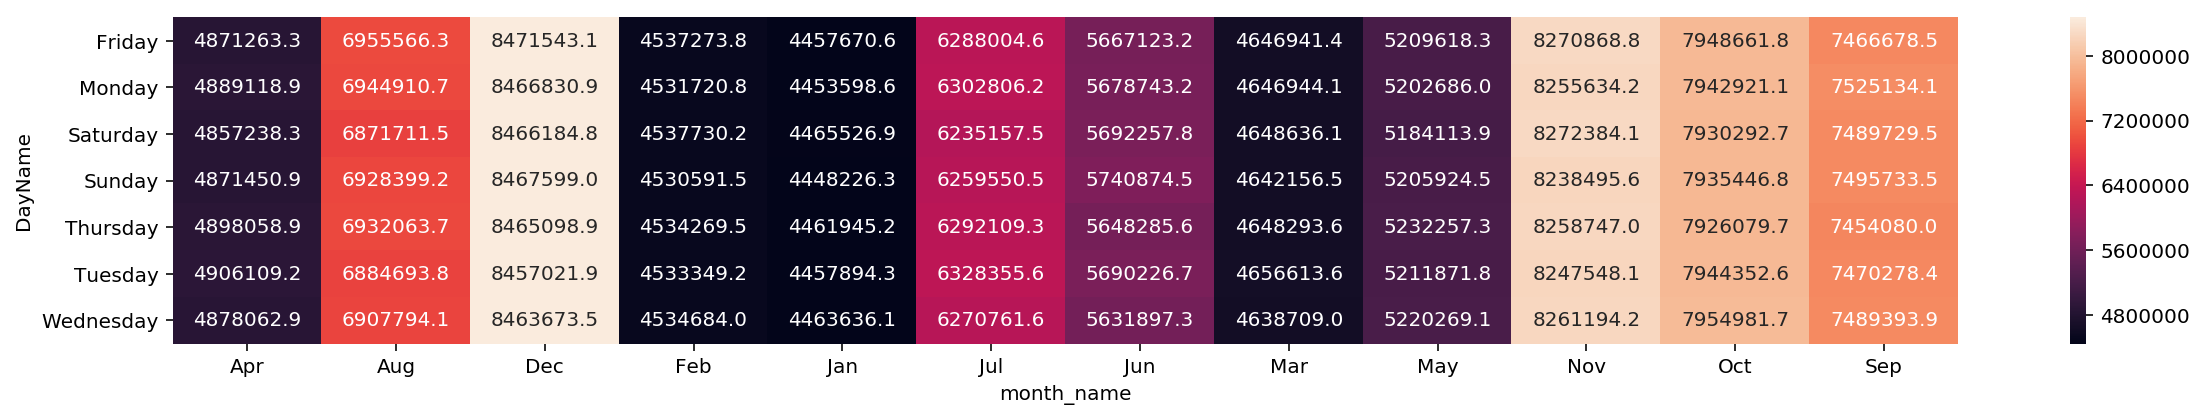

In [92]:
fig = plt.figure(figsize=(20,3))
divvyTripsHM15 = divvyTrips2015.pivot_table(index='DayName',columns='month_name',values='trip_id')
sns.heatmap(divvyTripsHM15, annot=True, fmt=".1f")
plt.show()

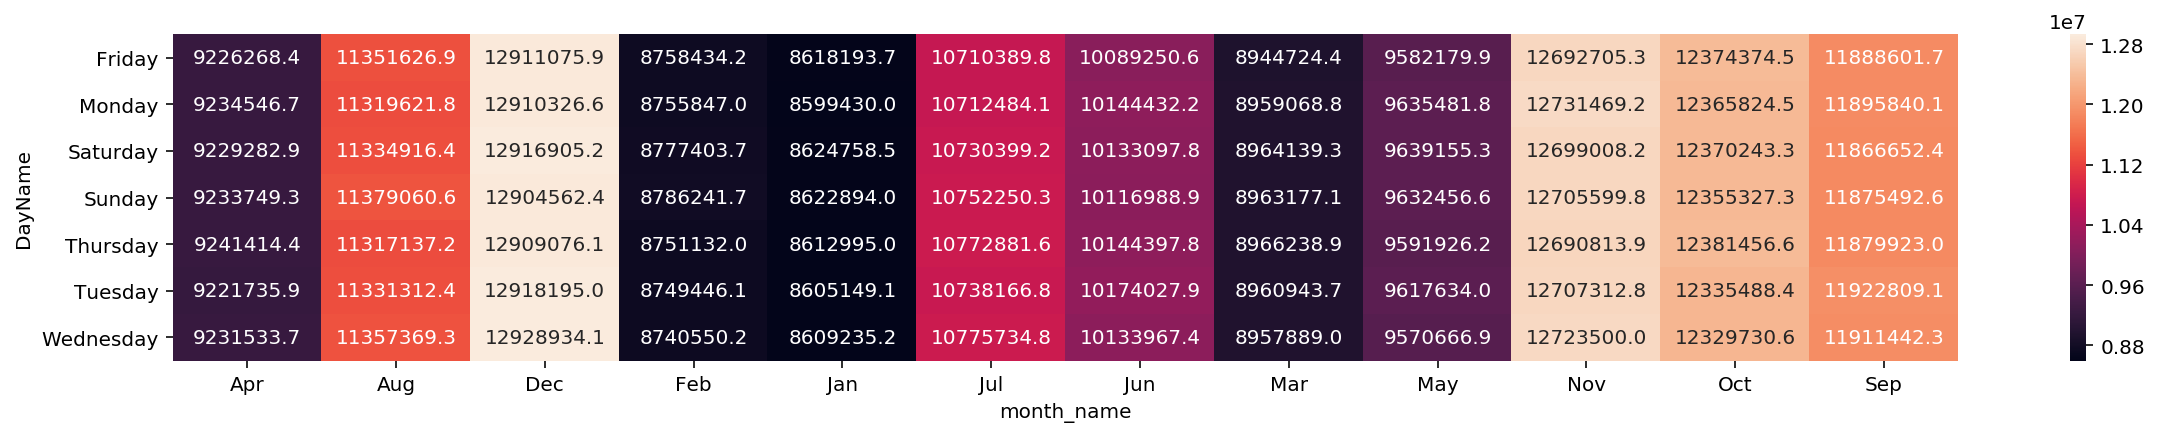

In [93]:
fig = plt.figure(figsize=(20,3))
divvyTripsHM16 = divvyTrips2016.pivot_table(index='DayName',columns='month_name',values='trip_id')
sns.heatmap(divvyTripsHM16, annot=True, fmt=".1f")
plt.show()

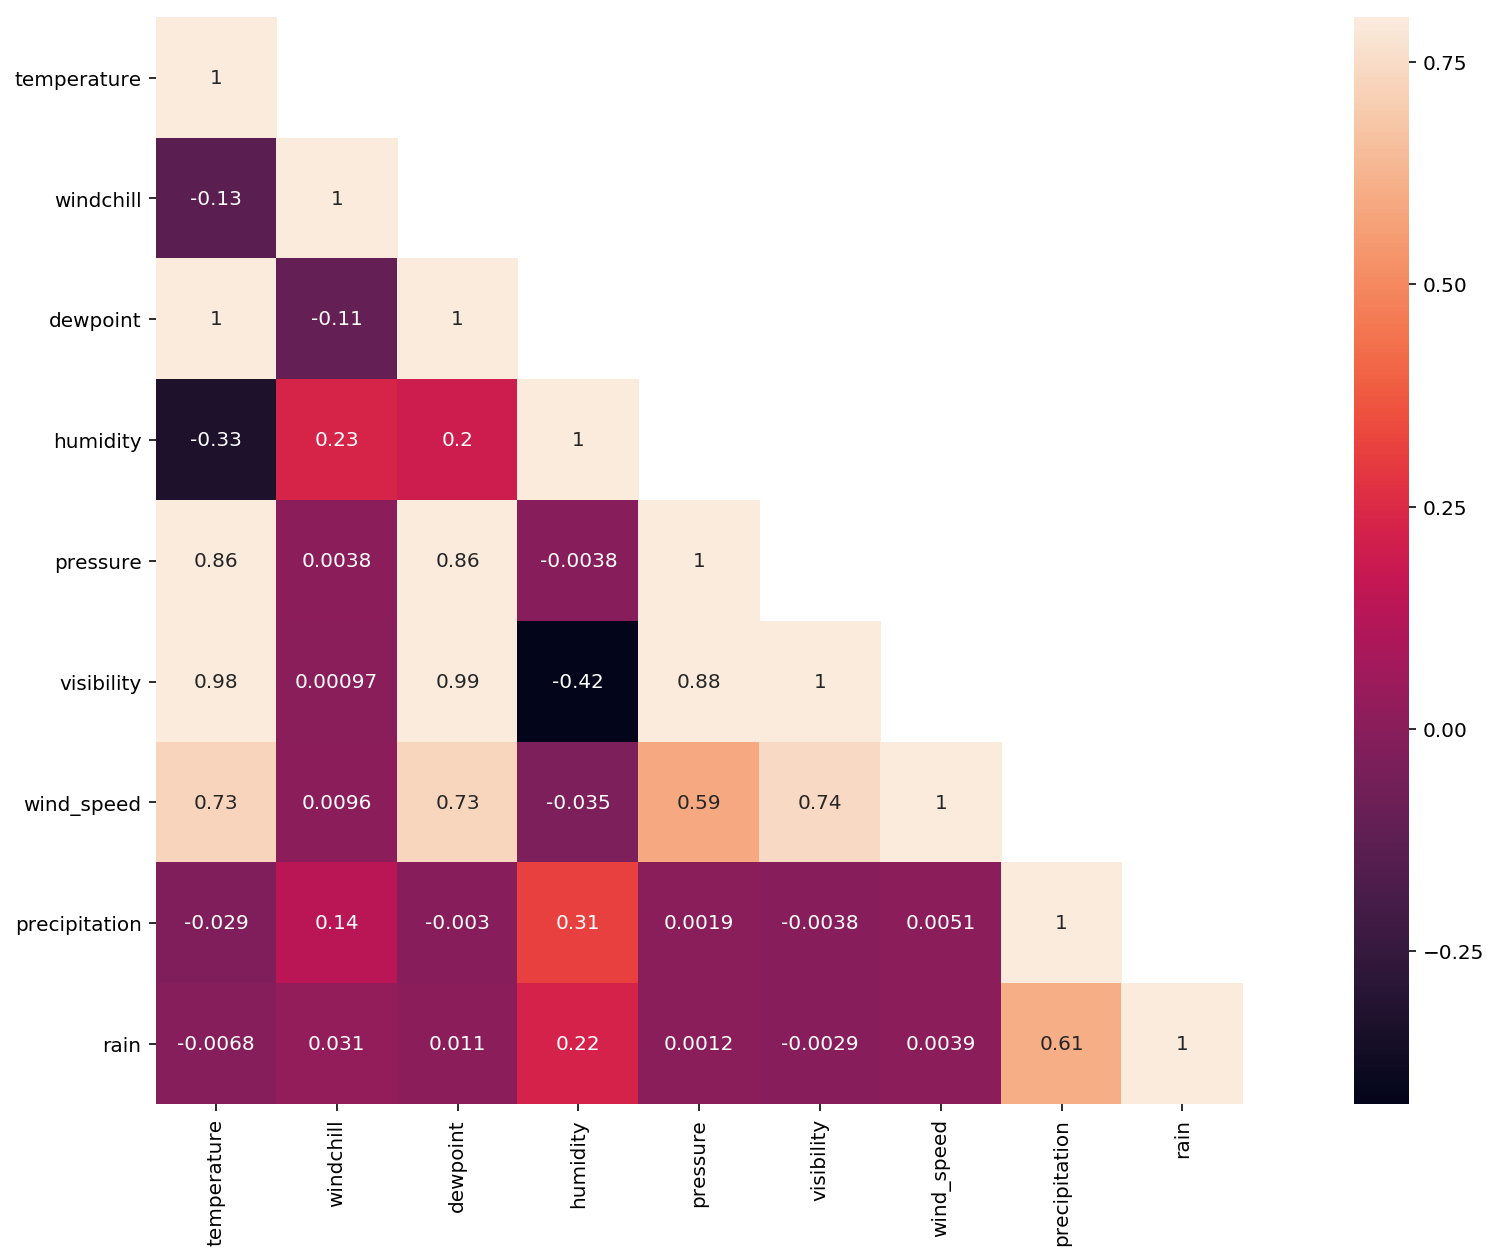

In [8]:
corrMatt = divvyTrips2014[['temperature'
,'windchill'
,'dewpoint'
,'humidity'
,'pressure'
,'visibility'
,'wind_speed'
,'precipitation'
,'events'
,'rain'
,'conditions']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

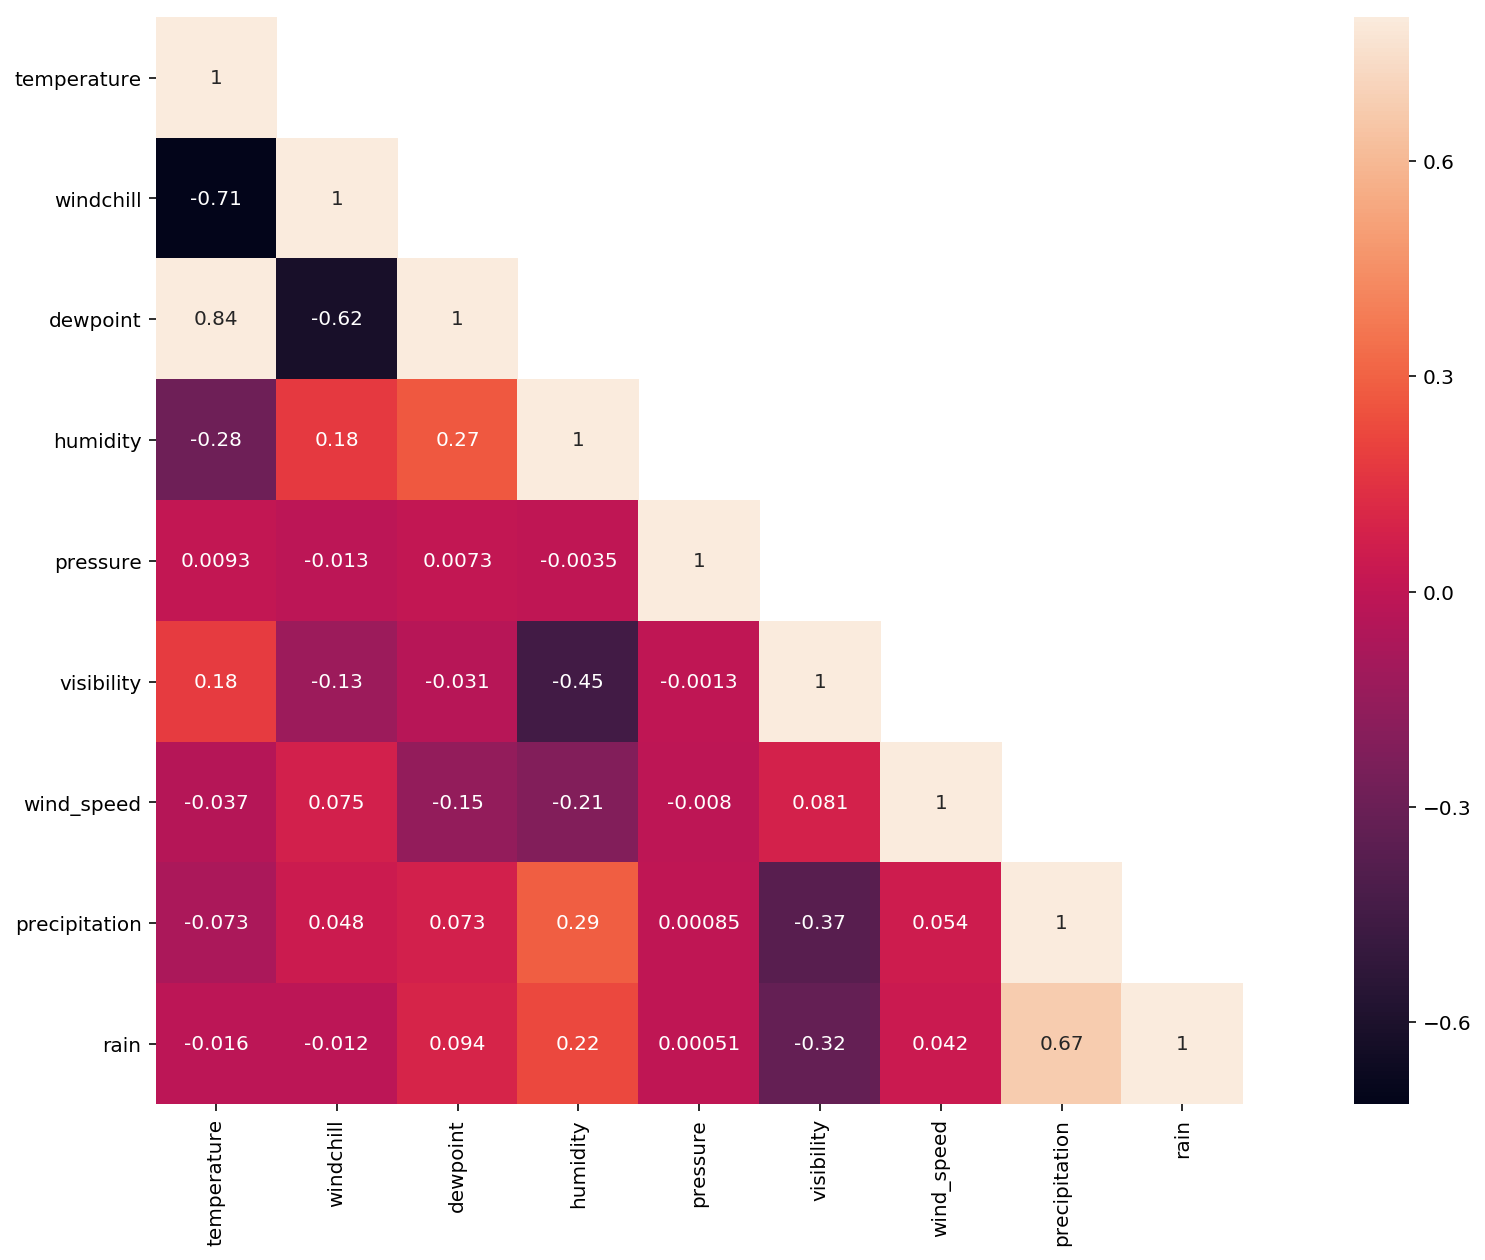

In [3]:
corrMatt = divvyTrips2015[['temperature'
,'windchill'
,'dewpoint'
,'humidity'
,'pressure'
,'visibility'
,'wind_speed'
,'precipitation'
,'events'
,'rain'
,'conditions']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

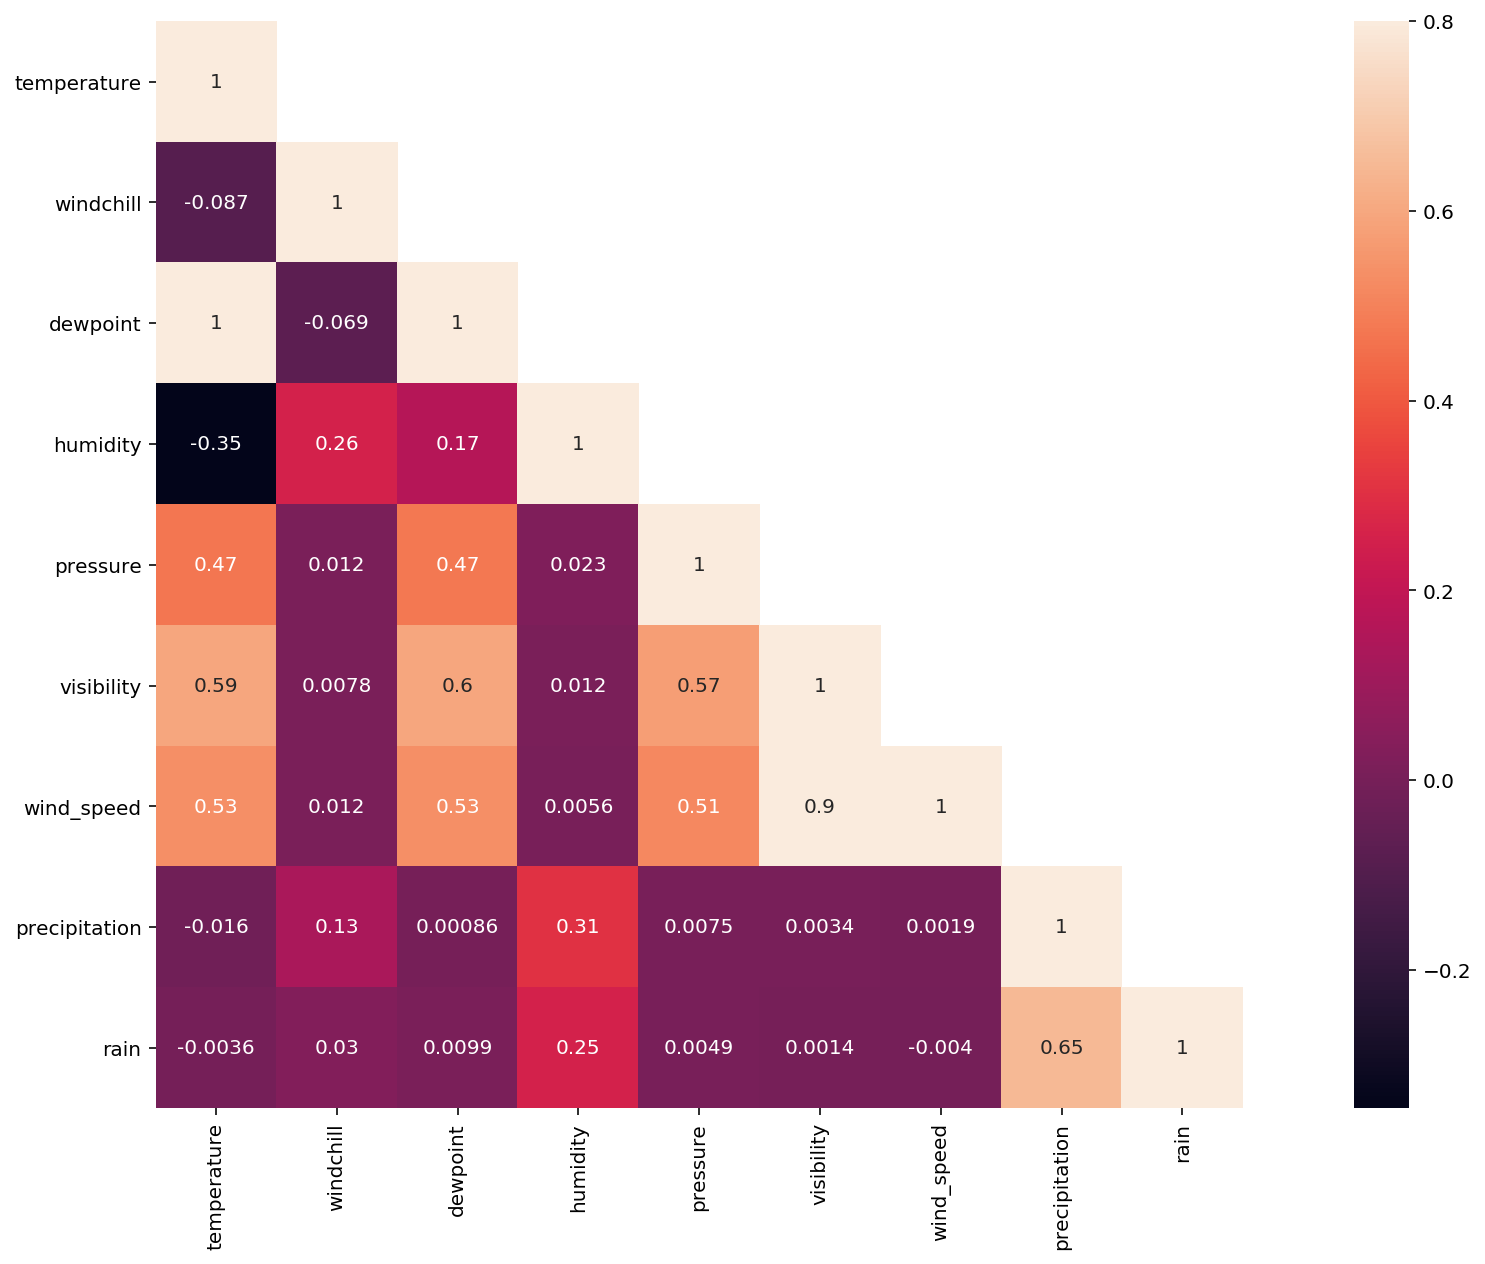

In [4]:
corrMatt = divvyTrips2016[['temperature'
,'windchill'
,'dewpoint'
,'humidity'
,'pressure'
,'visibility'
,'wind_speed'
,'precipitation'
,'events'
,'rain'
,'conditions']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

Text(0.5,1,'2016')

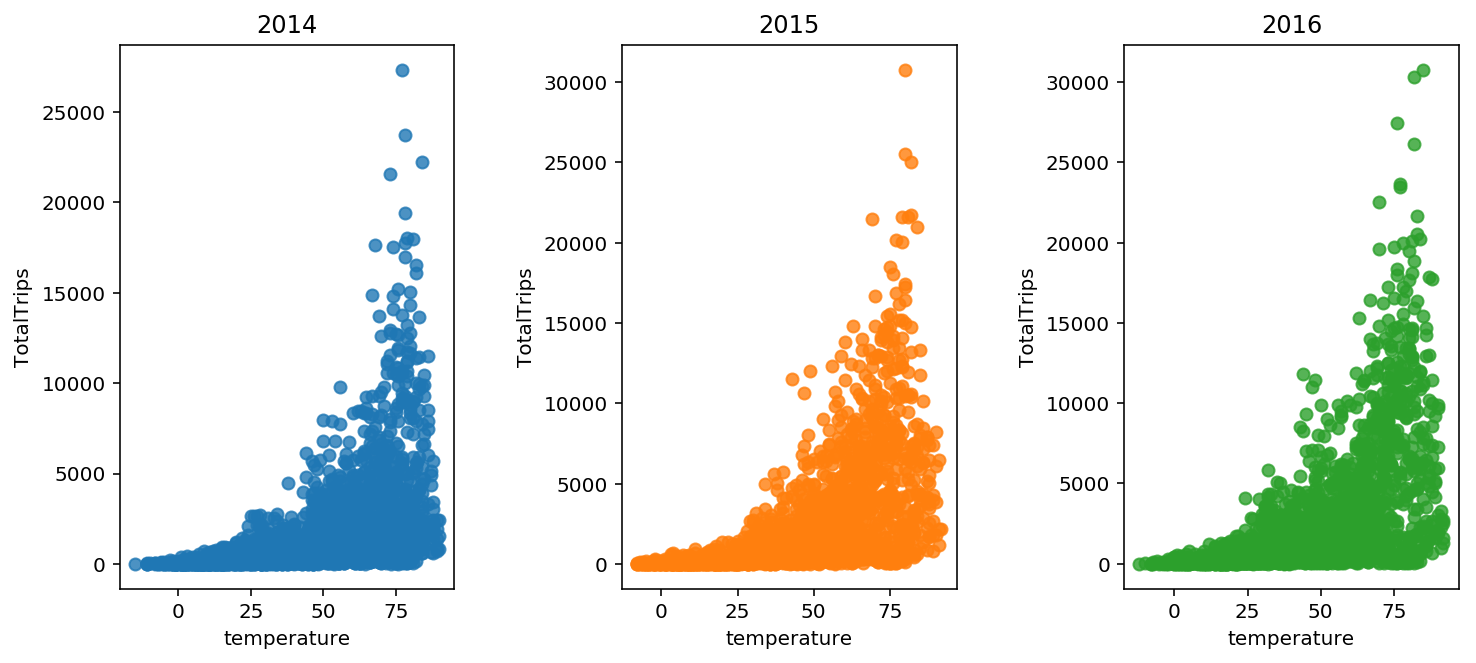

In [89]:
# Get the number of trips per hour for 2014, 2015, 2016 datasets
trip_counts2014 = divvyTrips2014.groupby(['Hour','temperature'])['trip_id'].size()
trip_counts2014 = trip_counts2014.to_frame().reset_index().sort_values(['Hour'])
trip_counts2014.rename(columns={'trip_id':'TotalTrips'},inplace=True)

trip_counts2015 = divvyTrips2015.groupby(['Hour','temperature'])['trip_id'].size()
trip_counts2015 = trip_counts2015.to_frame().reset_index().sort_values(['Hour'])
trip_counts2015.rename(columns={'trip_id':'TotalTrips'},inplace=True)

trip_counts2016 = divvyTrips2016.groupby(['Hour','temperature'])['trip_id'].size()
trip_counts2016 = trip_counts2016.to_frame().reset_index().sort_values(['Hour'])
trip_counts2016.rename(columns={'trip_id':'TotalTrips'},inplace=True)


##CLEANING

#Deleting DataFrame row in Pandas based on column value
trip_counts2014 = trip_counts2014[trip_counts2014.temperature != -9999.0].dropna()
trip_counts2015 = trip_counts2015[trip_counts2015.temperature != -9999.0].dropna()
trip_counts2016 = trip_counts2016[trip_counts2016.temperature != -9999.0].dropna()

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
fig.subplots_adjust(hspace=1.0, wspace=0.5)

axes1 = sns.regplot(x="temperature", y='TotalTrips', data=trip_counts2014,fit_reg=False,ax=ax1)
axes1.set_title("2014")
axes2=sns.regplot(x="temperature", y='TotalTrips', data=trip_counts2015,fit_reg=False,ax=ax2)
axes2.set_title("2015")
axes3=sns.regplot(x="temperature", y='TotalTrips', data=trip_counts2016,fit_reg=False,ax=ax3)
axes3.set_title("2016")

Text(0.5,1,'2016')

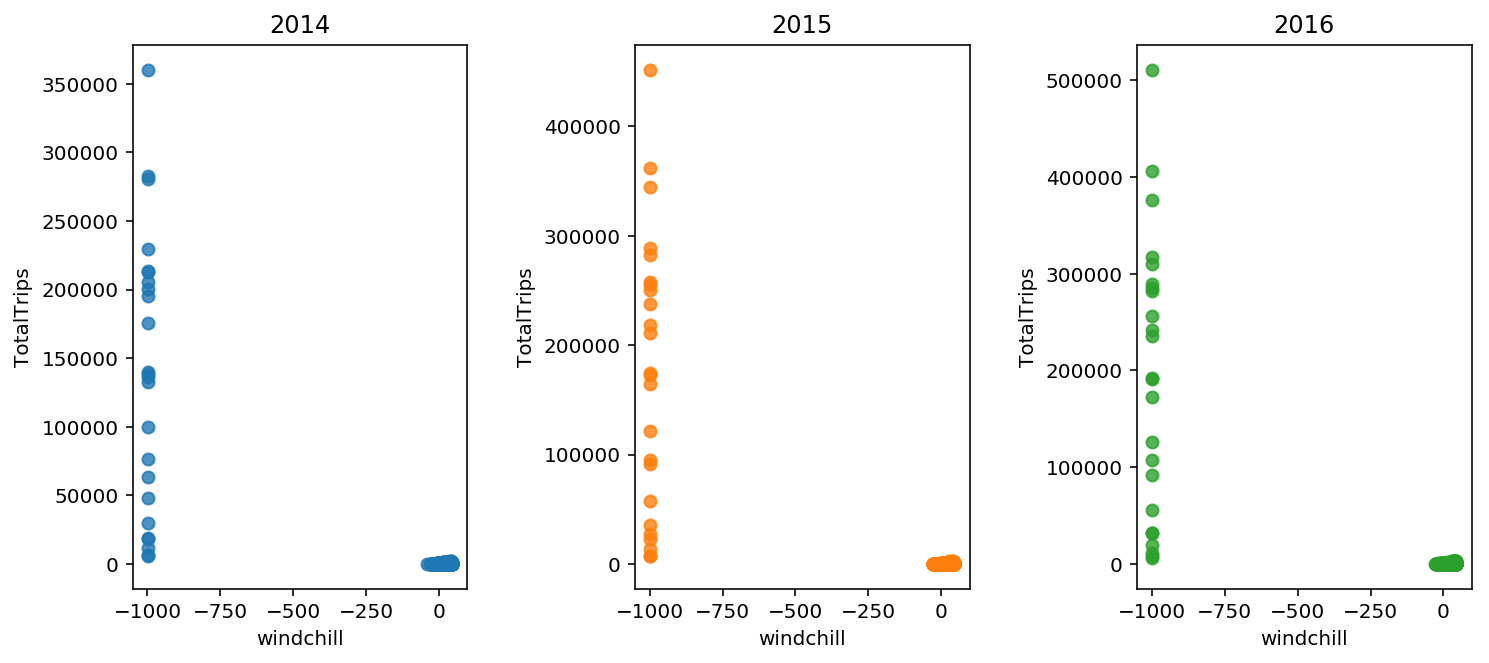

In [88]:
# Get the number of trips per hour for 2014, 2015, 2016 datasets
trip_counts2014 = divvyTrips2014.groupby(['Hour','windchill'])['trip_id'].size()
trip_counts2014 = trip_counts2014.to_frame().reset_index().sort_values(['Hour'])
trip_counts2014.rename(columns={'trip_id':'TotalTrips'},inplace=True)

trip_counts2015 = divvyTrips2015.groupby(['Hour','windchill'])['trip_id'].size()
trip_counts2015 = trip_counts2015.to_frame().reset_index().sort_values(['Hour'])
trip_counts2015.rename(columns={'trip_id':'TotalTrips'},inplace=True)

trip_counts2016 = divvyTrips2016.groupby(['Hour','windchill'])['trip_id'].size()
trip_counts2016 = trip_counts2016.to_frame().reset_index().sort_values(['Hour'])
trip_counts2016.rename(columns={'trip_id':'TotalTrips'},inplace=True)


##CLEANING

#Deleting DataFrame row in Pandas based on column value
trip_counts2014 = trip_counts2014[trip_counts2014.windchill != -9999.0].dropna()
trip_counts2015 = trip_counts2015[trip_counts2015.windchill != -9999.0].dropna()
trip_counts2016 = trip_counts2016[trip_counts2016.windchill != -9999.0].dropna()


fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.subplots_adjust(hspace=1.0, wspace=0.5)
fig.set_size_inches(12, 5)
axes1 = sns.regplot(x="windchill", y='TotalTrips', data=trip_counts2014,fit_reg=False,ax=ax1)
axes1.set_title("2014")
axes2=sns.regplot(x="windchill", y='TotalTrips', data=trip_counts2015,fit_reg=False,ax=ax2)
axes2.set_title("2015")
axes3=sns.regplot(x="windchill", y='TotalTrips', data=trip_counts2016,fit_reg=False,ax=ax3)
axes3.set_title("2016")



Text(0.5,1,'2016')

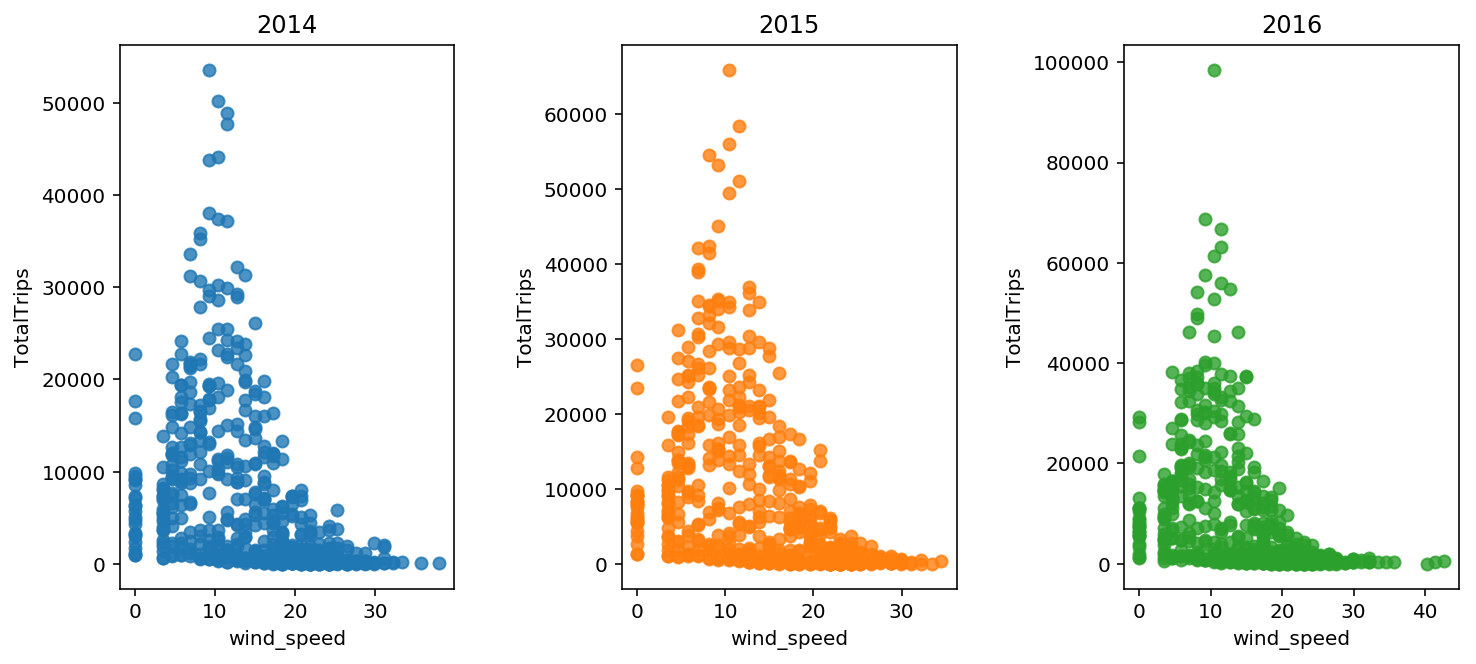

In [90]:
# Get the number of trips per hour for 2014, 2015, 2016 datasets
trip_counts2014 = divvyTrips2014.groupby(['Hour','wind_speed'])['trip_id'].size()
trip_counts2014 = trip_counts2014.to_frame().reset_index().sort_values(['Hour'])
trip_counts2014.rename(columns={'trip_id':'TotalTrips'},inplace=True)

trip_counts2015 = divvyTrips2015.groupby(['Hour','wind_speed'])['trip_id'].size()
trip_counts2015 = trip_counts2015.to_frame().reset_index().sort_values(['Hour'])
trip_counts2015.rename(columns={'trip_id':'TotalTrips'},inplace=True)

trip_counts2016 = divvyTrips2016.groupby(['Hour','wind_speed'])['trip_id'].size()
trip_counts2016 = trip_counts2016.to_frame().reset_index().sort_values(['Hour'])
trip_counts2016.rename(columns={'trip_id':'TotalTrips'},inplace=True)


##CLEANING

#Deleting DataFrame row in Pandas based on column value
trip_counts2014 = trip_counts2014[trip_counts2014.wind_speed != -9999.0].dropna()
trip_counts2015 = trip_counts2015[trip_counts2015.wind_speed != -9999.0].dropna()
trip_counts2016 = trip_counts2016[trip_counts2016.wind_speed != -9999.0].dropna()


fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
fig.subplots_adjust(hspace=1.0, wspace=0.5)

axes1 = sns.regplot(x="wind_speed", y='TotalTrips', data=trip_counts2014,fit_reg=False,ax=ax1)
axes1.set_title("2014")
axes2=sns.regplot(x="wind_speed", y='TotalTrips', data=trip_counts2015,fit_reg=False,ax=ax2)
axes2.set_title("2015")
axes3=sns.regplot(x="wind_speed", y='TotalTrips', data=trip_counts2016,fit_reg=False,ax=ax3)
axes3.set_title("2016")



Text(0.5,1,'2016')

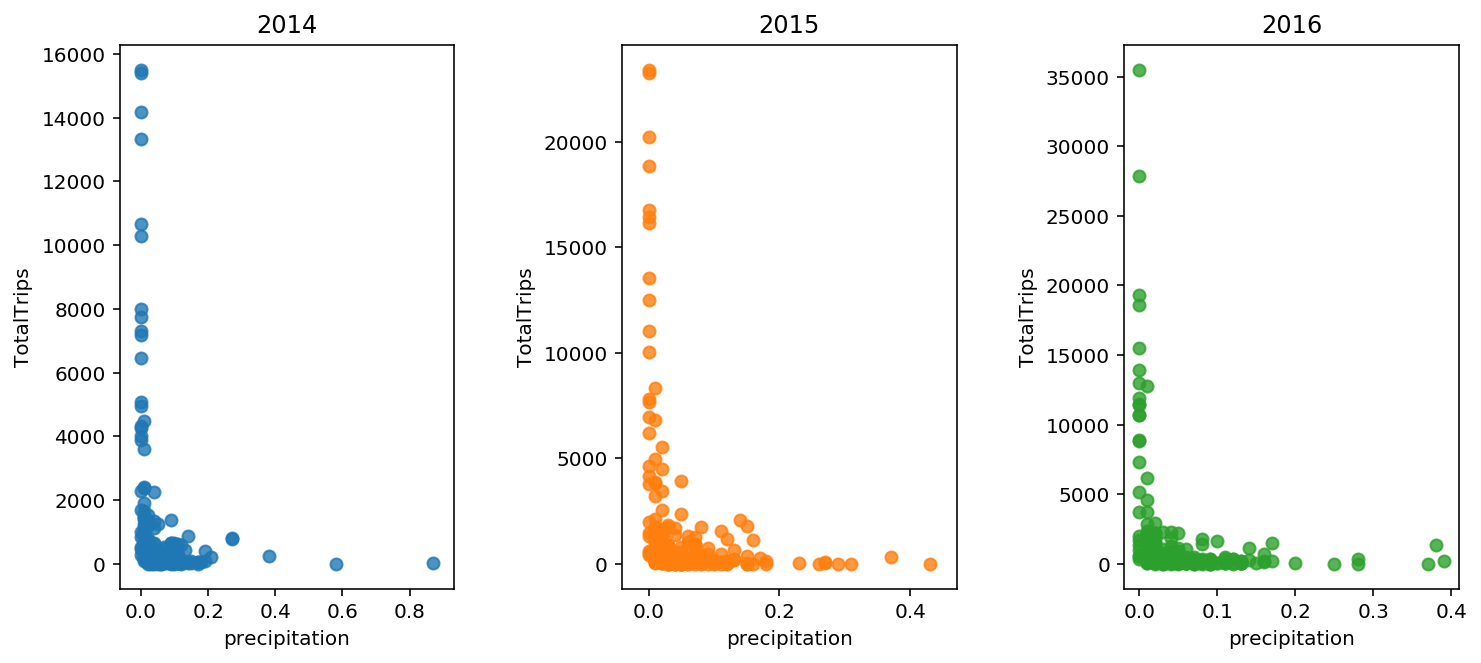

In [94]:
# Get the number of trips per hour for 2014, 2015, 2016 datasets
trip_counts2014 = divvyTrips2014.groupby(['Hour','precipitation'])['trip_id'].size()
trip_counts2014 = trip_counts2014.to_frame().reset_index().sort_values(['Hour'])
trip_counts2014.rename(columns={'trip_id':'TotalTrips'},inplace=True)

trip_counts2015 = divvyTrips2015.groupby(['Hour','precipitation'])['trip_id'].size()
trip_counts2015 = trip_counts2015.to_frame().reset_index().sort_values(['Hour'])
trip_counts2015.rename(columns={'trip_id':'TotalTrips'},inplace=True)

trip_counts2016 = divvyTrips2016.groupby(['Hour','precipitation'])['trip_id'].size()
trip_counts2016 = trip_counts2016.to_frame().reset_index().sort_values(['Hour'])
trip_counts2016.rename(columns={'trip_id':'TotalTrips'},inplace=True)


##CLEANING

#Deleting DataFrame row in Pandas based on column value
trip_counts2014 = trip_counts2014[trip_counts2014.precipitation != -9999.0].dropna()
trip_counts2015 = trip_counts2015[trip_counts2015.precipitation != -9999.0].dropna()
trip_counts2016 = trip_counts2016[trip_counts2016.precipitation != -9999.0].dropna()


fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
fig.subplots_adjust(hspace=1.0, wspace=0.5)

axes1 = sns.regplot(x="precipitation", y='TotalTrips', data=trip_counts2014,fit_reg=False,ax=ax1)
axes1.set_title("2014")
axes2=sns.regplot(x="precipitation", y='TotalTrips', data=trip_counts2015,fit_reg=False,ax=ax2)
axes2.set_title("2015")
axes3=sns.regplot(x="precipitation", y='TotalTrips', data=trip_counts2016,fit_reg=False,ax=ax3)
axes3.set_title("2016")

In [196]:
divvyTrips2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5309788 entries, 0 to 5309787
Data columns (total 94 columns):
Unnamed: 0                                 int64
Unnamed: 0.1                               int64
trip_id                                    int64
usertype                                   object
gender                                     object
starttime                                  object
stoptime                                   object
tripduration                               int64
from_station_id                            int64
from_station_name                          object
latitude_start                             float64
longitude_start                            float64
dpcapacity_start                           float64
to_station_id                              int64
to_station_name                            object
latitude_end                               float64
longitude_end                              float64
dpcapacity_end                        

# Arrival and Departure By station

In [193]:
divvyRoutes2016 = pd.DataFrame()
divvyRoutes2016["Start Time"] = pd.to_datetime(divvyTrips2016["starttime"])
divvyRoutes2016["Stop Time"] = pd.to_datetime(divvyTrips2016["starttime"])
divvyRoutes2016["Hour"] = divvyTrips2016["Hour"]

divvyRoutes2016["Start Station Latitude"] = divvyTrips2016["latitude_start"]
divvyRoutes2016["Start Station Longitude"] = divvyTrips2016["longitude_start"]
divvyRoutes2016["End Station Latitude"] = divvyTrips2016["latitude_end"]
divvyRoutes2016["End Station Longitude"] = divvyTrips2016["longitude_end"]
divvyRoutes2016["Start Station Name"] = divvyTrips2016["from_station_name"]
divvyRoutes2016["Start Station ID"] = divvyTrips2016["from_station_id"]
divvyRoutes2016["End Station ID"] = divvyTrips2016["to_station_id"]


locations = divvyRoutes2016.groupby(["Hour","Start Station Latitude"
                                                       ,"Start Station Longitude"
                                                       ,"End Station Latitude"
                                                       ,"End Station Longitude"
                                                       ,"Start Station Name"
                                                       ,"Start Station ID"
                                                       ,"End Station ID"]).size().drop_duplicates()

locations = locations.to_frame().reset_index().sort_values(['Hour'])
locations.rename(columns={0:'Count'},inplace=True)

In [190]:

#Select one hour of the day, and count trips with the same departure point.

subset = divvyRoutes2016[divvyRoutes2016["Hour"]==10]
departure_counts =  subset.groupby("Start Station ID").count()
# select one column
departure_counts = departure_counts.iloc[:,[0]]
# and rename that column
departure_counts.columns= ["Departure Count"]

subset = divvyRoutes2016[divvyRoutes2016["Hour"]==10]
arrival_counts =  subset.groupby("End Station ID").count()
# select one column
arrival_counts = arrival_counts.iloc[:,[0]]
# and rename that column
arrival_counts.columns= ["Arrival Count"]

#join the arrival counts, departure counts and locations into one table
trip_counts = departure_counts.join(locations).join(arrival_counts)
trip_counts.dropna(inplace=True)
import folium
from folium import plugins
print(folium.__version__)

folium_map1 = folium.Map(location=[41.8781, -87.6298],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')


for index, row in trip_counts.iterrows():
    net_departures = (row["Departure Count"]-row["Arrival Count"])
    radius = net_departures/20
    if net_departures>0:
        color="#E37222" # tangerine
    else:
        color="#0A8A9F" # teal
    
    folium.CircleMarker(location=(row["Start Station Latitude"],
                                  row["Start Station Longitude"]),
                        radius=radius,
                        color=color,
                        fill=True).add_to(folium_map1)
folium_map1

0.6.0


In [191]:

#Select one hour of the day, and count trips with the same departure point.

subset = divvyRoutes2014[divvyRoutes2014["Hour"]==6]
departure_counts =  subset.groupby("Start Station ID").count()
# select one column
departure_counts = departure_counts.iloc[:,[0]]
# and rename that column
departure_counts.columns= ["Departure Count"]

subset = divvyRoutes2014[divvyRoutes2014["Hour"]==6]
arrival_counts =  subset.groupby("End Station ID").count()
# select one column
arrival_counts = arrival_counts.iloc[:,[0]]
# and rename that column
arrival_counts.columns= ["Arrival Count"]

#join the arrival counts, departure counts and locations into one table
trip_counts = departure_counts.join(locations).join(arrival_counts)
trip_counts.dropna(inplace=True)

import folium
from folium import plugins
print(folium.__version__)

folium_map2 = folium.Map(location=[41.8781, -87.6298],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')


for index, row in trip_counts.iterrows():
    net_departures = (row["Departure Count"]-row["Arrival Count"])
    radius = net_departures/20
    if net_departures>0:
        color="#E37222" # tangerine
    else:
        color="#0A8A9F" # teal
    
    folium.CircleMarker(location=(row["Start Station Latitude"],
                                  row["Start Station Longitude"]),
                        radius=radius,
                        color=color,
                        fill=True).add_to(folium_map2)
folium_map2

0.6.0


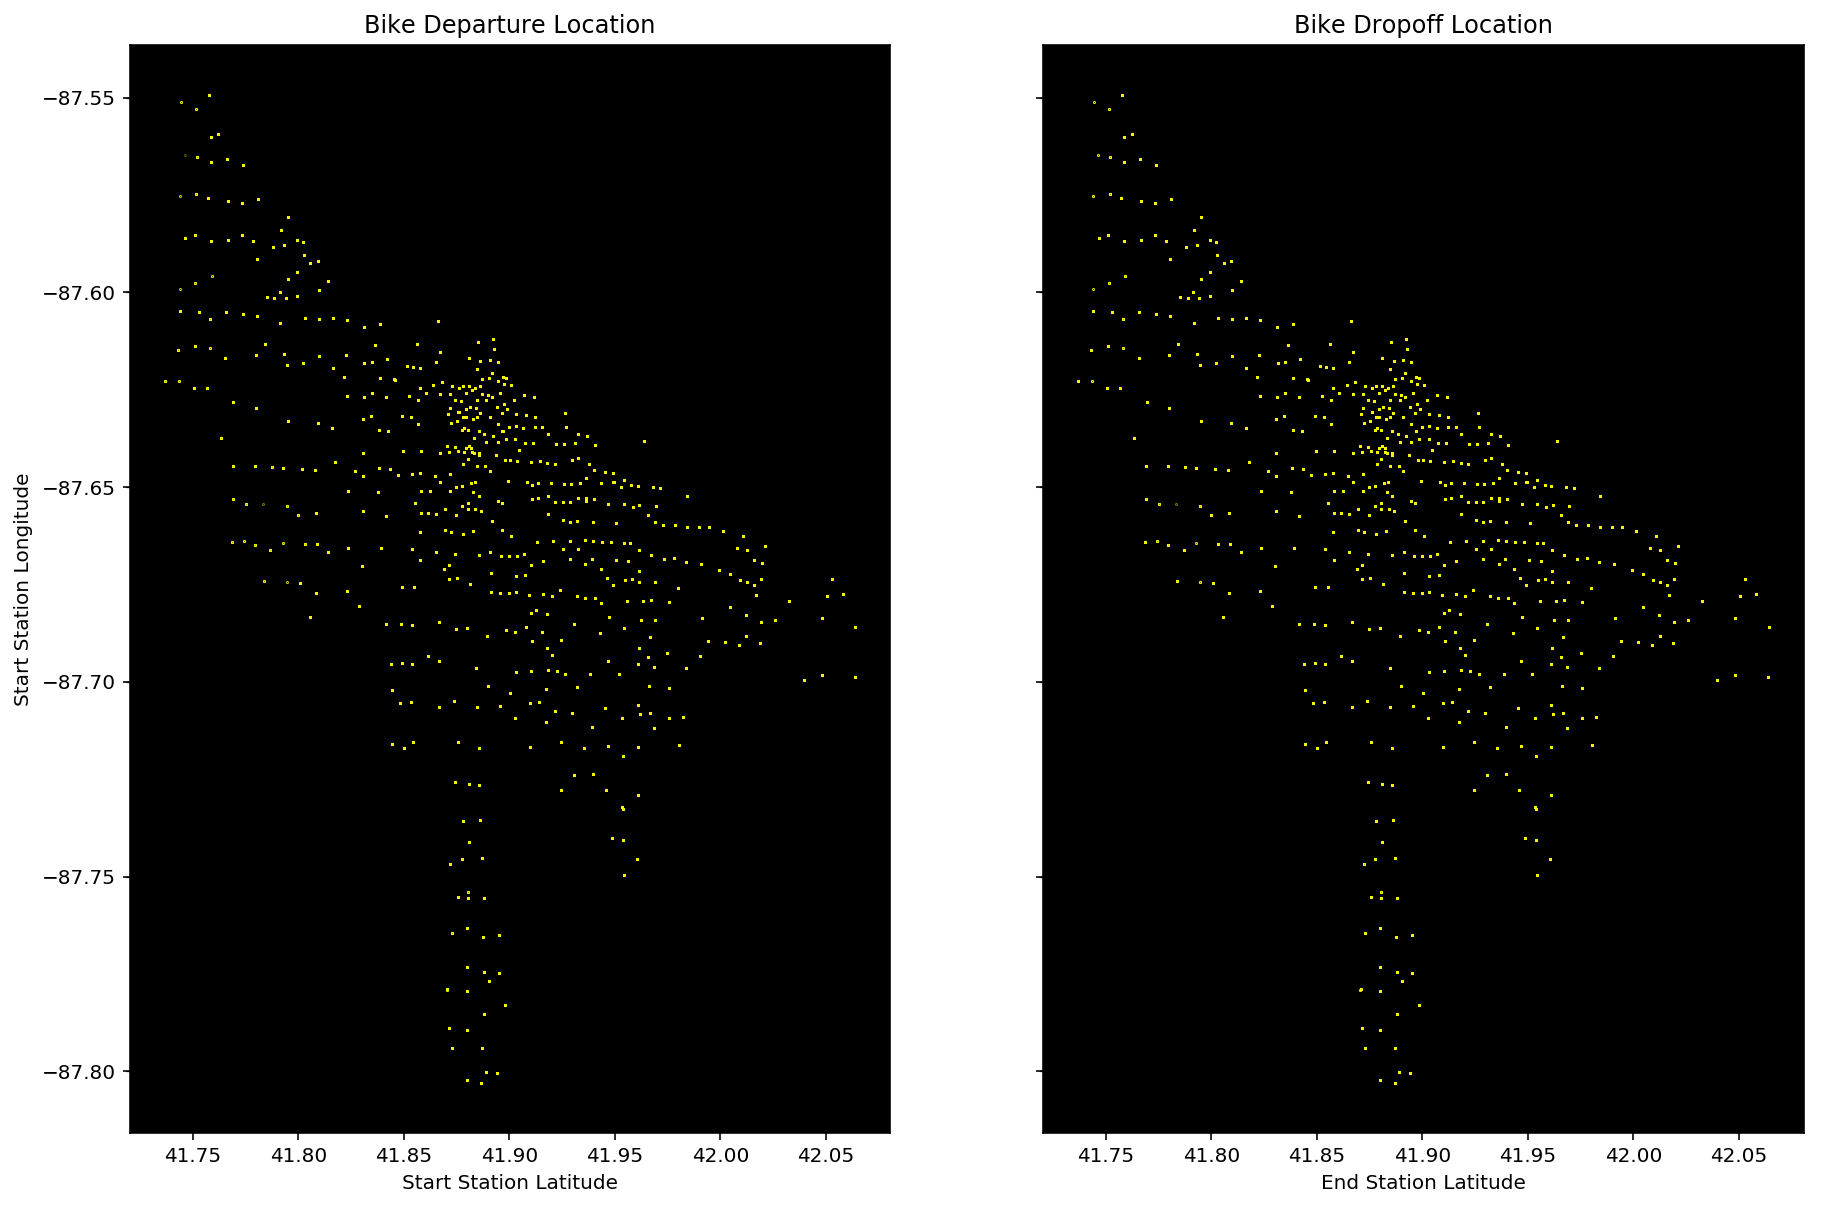

In [194]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))
divvyRoutes2016.plot(kind='scatter', x='Start Station Latitude', y='Start Station Longitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Bike Departure Location")
ax1.set_facecolor('black')

divvyRoutes2016.plot(kind='scatter', x='End Station Latitude', y='End Station Longitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Bike Dropoff Location")
ax2.set_facecolor('black') 